In [1]:
import matplotlib.pylab as plt
import jetset
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
import numpy as np

# 3C 273

## Data

In [2]:
d=np.genfromtxt('3C273_2012_2016.txt')
data=Data(n_rows=d.shape[0])
data.set_field('x',d[:,0])
data.set_field('y',d[:,1])
data.set_field('dy',value=d[:,2])

In [3]:
data.set_meta_data('z',0.15834)
data.set_meta_data('restframe','obs')
data.set_meta_data('data_scale','log-log')
data.set_meta_data('obj_name','3C273 - 2016')

In [4]:
data.table

x,dx,y,dy,T_start,T_stop,UL,data_set
Hz,Hz,erg / (cm2 s),erg / (cm2 s),MJD,MJD,,
float64,float64,float64,float64,float64,float64,bool,bytes16
10.18,0.0,-11.48,0.008901,0.0,0.0,False,0.0
10.96,0.0,-10.76,0.02835,0.0,0.0,False,0.0
11.01,0.0,-10.71,0.03215,0.0,0.0,False,0.0
11.35,0.0,-10.56,0.05016,0.0,0.0,False,0.0
11.44,0.0,-10.62,0.2,0.0,0.0,False,0.0
11.54,0.0,-10.55,0.03041,0.0,0.0,False,0.0
14.52,0.0,-9.979,0.02222,0.0,0.0,False,0.0
14.84,0.0,-9.762,0.05242,0.0,0.0,False,0.0


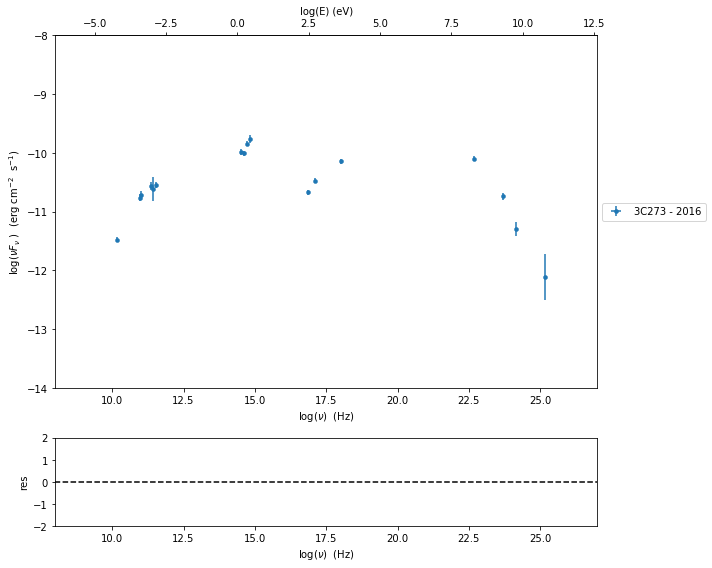

In [5]:
#Obs
%matplotlib inline
sed_data=ObsData(data_table=data)

sed_data.add_systematics(0.1,[10.**6,10.**29])
p=sed_data.plot_sed(frame='obs')
p.rescale(x_min=8,x_max=27,y_min=-14,y_max=-8)
p.sedplot.grid(False)
p.fig.savefig('3C273_obs_frame.png')

In [7]:
sed_data.save('3C273.pkl')

## Phenomenological model constraining


*** evaluating spectral indices for data ***



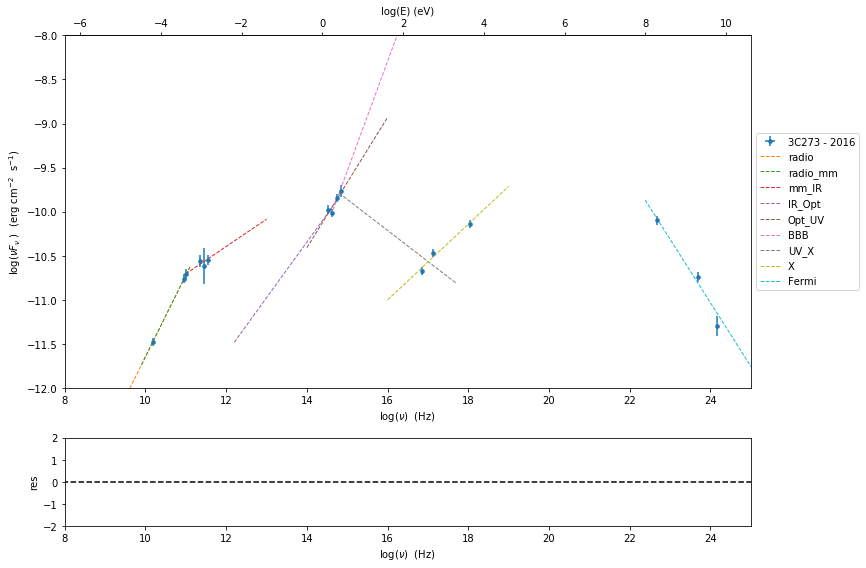

In [8]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices(silent=True)
p=my_shape.plot_indices()
p.rescale(x_min=8,x_max=25,y_min=-12,y_max=-8)
p.sedplot.grid(False)

In [9]:
# SYNCHROTRON 
mm,best_fit=my_shape.sync_fit(check_BBB_template=True,
                              check_host_gal_template=False,
                              use_log_par=True,
                              Ep_start=None,
                              minimizer='minuit',
                              silent=True,
                              fit_range=[10,16])



*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 16]
--> class:  LSP

--> class:  LSP


  model name      name     bestfit val     err +     err -   start val   fit range min fit range max frozen
------------- ----------- ------------- ------------ ----- ------------- ------------- ------------- ------
LogParabolaEp           b -1.636749e-01 2.151319e-02    -- -1.145592e-01 -1.000000e+01  0.000000e+00  False
LogParabolaEp          Ep  1.307566e+01 2.455866e-01    --  1.389217e+01  0.000000e+00  3.000000e+01  False
LogParabolaEp          Sp -1.008000e+01 9.491327e-02    -- -9.846109e+00 -3.000000e+01  0.000000e+00  False
          BBB nuFnu_p_BBB -9.566368e+00 1.011334e-01    -- -9.846109e+00 -1.184611e+01 -7.846109e+00  False
          BBB    nu_scale  1.360524e-04 3.263365e-07    --  0.000000e+00 -5.000000e-01  5.000000e-01  False
---> sync       nu_p=+1.307566e+01 (err=+2.455866e-01)  nuFnu_p=-1.008000e+01 (err=+9.491327e-02) cur

In [10]:
# INVERSE COMPTON
my_shape.IC_fit(fit_range=[16,26],minimizer='lsb', silent=True)



*** Log-Polynomial fitting of the IC component ***
---> fit range: [16, 26]
---> LogCubic fit


model name name  bestfit val     err +     err -   start val   fit range min fit range max frozen
---------- ---- ------------- ------------ ----- ------------- ------------- ------------- ------
  LogCubic    b -1.007154e-01 7.271402e-03    -- -1.000000e+00 -1.000000e+01  0.000000e+00  False
  LogCubic    c -6.423257e-03 2.291142e-03    -- -1.000000e+00 -1.000000e+01  1.000000e+01  False
  LogCubic   Ep  2.055866e+01 1.199822e-01    --  2.037447e+01  0.000000e+00  3.000000e+01  False
  LogCubic   Sp -9.585524e+00 6.225231e-02    -- -1.000000e+01 -3.000000e+01  0.000000e+00  False
---> IC         nu_p=+2.055866e+01 (err=+1.199822e-01)  nuFnu_p=-9.585524e+00 (err=+6.225231e-02) curv.=-1.007154e-01 (err=+7.271402e-03)



(<jetset.minimizer.ModelMinimizer at 0x1a1c0c3fd0>,
 <jetset.minimizer.FitResults at 0x1a1bf81890>)

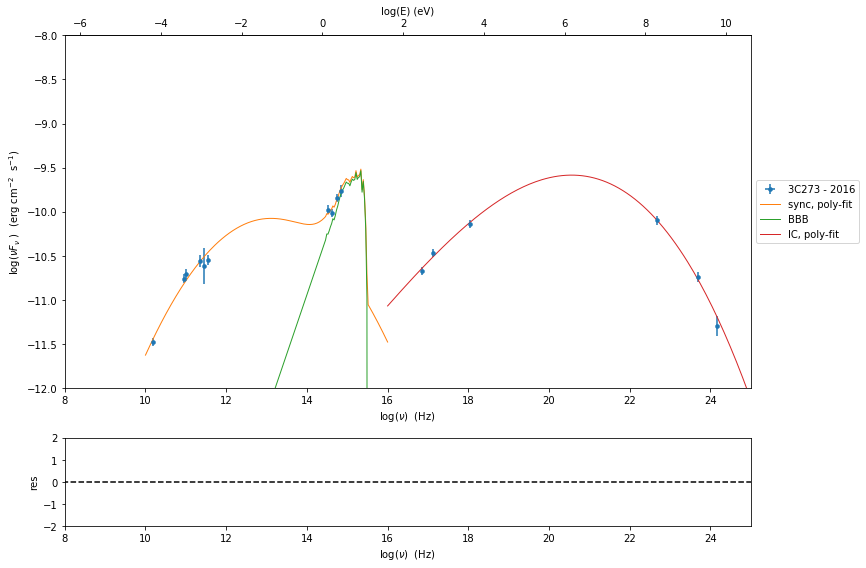

In [11]:
p=my_shape.plot_shape_fit()
p.rescale(x_min=8,x_max=25,y_min=-12,y_max=-8)
p.sedplot.grid(False)

# Model

In [65]:
#Constrain_SS_EC
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=9.5,
                        B_range=[0.089,1.8],
                        distr_e='lppl',
                        t_var_sec=4*86400,
                        nu_cut_IR=1E10,
                        SEDShape=my_shape)


prefit_jet=sed_obspar.constrain_SSC_EC_model(electron_distribution_log_values=False,EC_componets_list=['EC_Disk'],R_H=1E18,silent=True)


***  constrains parameters from observable ***

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 5.310112e+01     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.396702e+04     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 5.044310e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.140556e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 8.183746e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 5.468149e+02     1.000000e+00     1.000000e+09 False  False
               R         region_size           

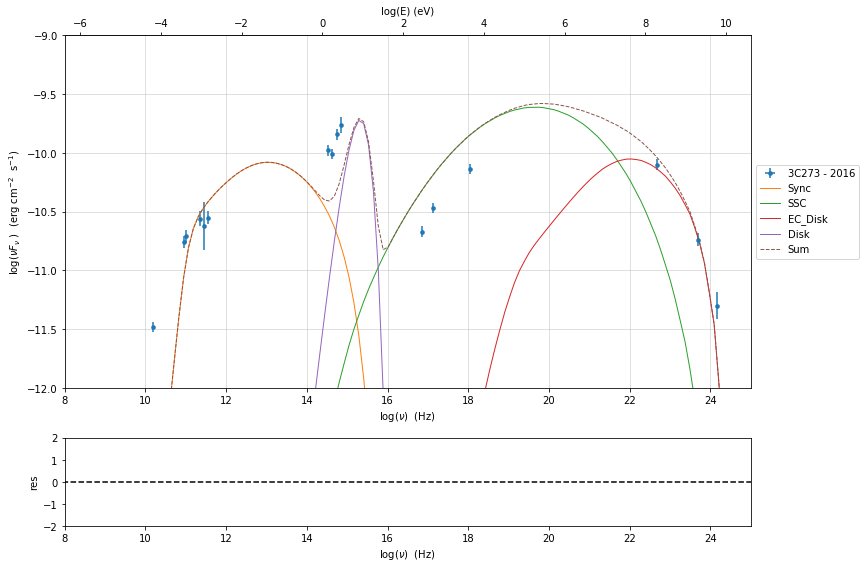

In [66]:
prefit_jet.eval()
p=prefit_jet.plot_model(sed_data=sed_data)
prefit_jet.save_model('prefit_jet_EC_model_2.pkl')
p.rescale(x_min=8,x_max=25,y_min=-12,y_max=-9)

## Model fitting with Minuit

In [67]:
from jetset.jet_model import Jet
jet_minuit=Jet.load_model('prefit_jet_EC_model_2.pkl')
jet_minuit.set_gamma_grid_size(300)
fit_model_minuit=FitModel( jet=jet_minuit, name='SSC-EC-best-fit_minuit')
fit_model_minuit.show_model_components()

      name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
            gmin  low-energy-cut-off lorentz-factor* 5.310112e+01     1.000000e+00     1.000000e+09 False  False
            gmax high-energy-cut-off lorentz-factor* 1.396702e+04     1.000000e+00     1.000000e+15 False  False
               N    emitters_density         1 / cm3 5.044310e+02     0.000000e+00               -- False  False
               s   LE_spectral_slope                 2.140556e+00    -1.000000e+01     1.000000e+01 False  False
               r  spectral_curvature                 8.183746e-01    -1.500000e+01     1.500000e+01 False  False
gamma0_log_parab    turn-over-energy lorentz-factor* 5.468149e+02     1.000000e+00     1.000000e+09 False  False
          L_Disk                Disk         erg / s 1.980042e+46     0.000000e+00              

/opt/anaconda3/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/model_manager.py:160: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


In [68]:
fit_model_minuit.freeze('jet_leptonic','z_cosm')
fit_model_minuit.freeze('jet_leptonic','R_H')
#fit_model_minuit.freeze('jet_leptonic','T_Disk')

fit_model_minuit.jet_leptonic.parameters.beam_obj.fit_range=[7., 30.]
fit_model_minuit.jet_leptonic.parameters.R.fit_range=[1E15,1E18]
fit_model_minuit.jet_leptonic.parameters.B.fit_range=[0.089,2]
fit_model_minuit.jet_leptonic.parameters.T_Disk.fit_range=[1E4,3E4]


In [69]:
from jetset.minimizer import ModelMinimizer
model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_minuit,sed_data,5E10,1E25,fitname='SSC-EC-best-fit_minuit',repeat=3)

filtering data in fit range = [5.000000e+10,1.000000e+25]
data length 15

*** start fit process ***
----- 
fit run: 0
/ minim function calls=1220, chisq=10.146719 UL part=-0.000000
fit run: 1
- minim function calls=210, chisq=10.145819 UL part=-0.000000rt=-0.000000
fit run: 2
\ minim function calls=210, chisq=10.144389 UL part=-0.000000000
**************************************************************************************************
Fit report

Model: SSC-EC-best-fit_minuit
 model name        name             par type           units          val      phys. bound. min phys. bound. max  log  frozen
------------ ---------------- ------------------- --------------- ------------ ---------------- ---------------- ----- ------
jet_leptonic             gmin  low-energy-cut-off lorentz-factor* 3.716599e+01     1.000000e+00     1.000000e+09 False  False
jet_leptonic             gmax high-energy-cut-off lorentz-factor* 9.654872e+08     1.000000e+00     1.000000e+15 False  False
jet_leptonic 

In [56]:
#best_fit_minuit.bestfit_table

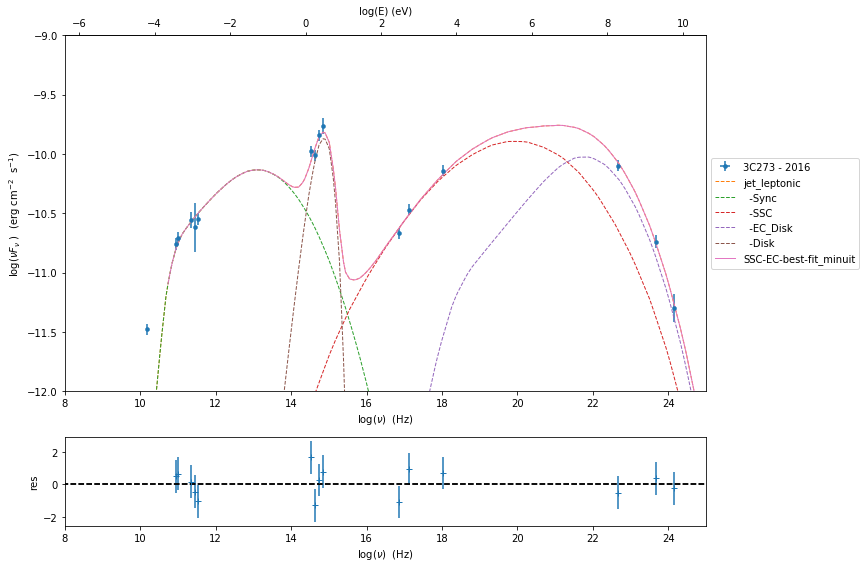

In [70]:
%matplotlib inline
fit_model_minuit.set_nu_grid(1E3,1E30,500)
fit_model_minuit.eval()
p=fit_model_minuit.plot_model(sed_data=sed_data)
p.rescale(x_min=8,x_max=25,y_min=-12,y_max=-9)
p.sedplot.grid(False)
#p.fig.savefig('fit_EC_3c273_2016_minuit.png')

In [58]:
best_fit_minuit.save_report('EC-best-fit-lppl_2016.txt')
model_minimizer_minuit.save_model('EC-best-fit-lppl_2016.pkl')